# Resampling Time Series Data

In [102]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt


In [103]:
df = web.DataReader('TSLA', 'yahoo', start='2020-01-01', end='2021-11-01')

In [104]:
df.loc[: , 'Close':].head()

,Close,Volume,Adj Close
Date,,,
2020-01-02,86.052002,47660500.0,86.052002
2020-01-03,88.601997,88892500.0,88.601997
2020-01-06,90.307999,50665000.0,90.307999
2020-01-07,93.811996,89410500.0,93.811996
2020-01-08,98.428001,155721500.0,98.428001


In [105]:
df.shape

(463, 6)

In [106]:
df_downsampled = df.resample('3D').last()
df_downsampled.loc[: , 'Close':].head()

,Close,Volume,Adj Close
Date,,,
2020-01-02,88.601997,88892500.0,88.601997
2020-01-05,93.811996,89410500.0,93.811996
2020-01-08,95.629997,64797500.0,95.629997
2020-01-11,104.972000,132588000.0,104.972000
2020-01-14,102.697998,108683500.0,102.697998


In [107]:
df_downsampled.index

DatetimeIndex(['2020-01-02', '2020-01-05', '2020-01-08', '2020-01-11',
               '2020-01-14', '2020-01-17', '2020-01-20', '2020-01-23',
               '2020-01-26', '2020-01-29',
               ...
               '2021-10-05', '2021-10-08', '2021-10-11', '2021-10-14',
               '2021-10-17', '2021-10-20', '2021-10-23', '2021-10-26',
               '2021-10-29', '2021-11-01'],
              dtype='datetime64[ns]', name='Date', length=224, freq='3D')

In [108]:
df_downsampled.index.freq

<3 * Days>

In [109]:
df_downsampled = df.resample('3B').last()
df_downsampled.loc[: , 'Close':].head()

,Close,Volume,Adj Close
Date,,,
2020-01-02,90.307999,50665000.0,90.307999
2020-01-07,96.267998,142202000.0,96.267998
2020-01-10,107.584000,144981000.0,107.584000
2020-01-15,102.099998,68145500.0,102.099998
2020-01-20,113.912003,156845000.0,113.912003


In [110]:
df_weekly = df.resample('W').mean()
df_monthly = df.resample('M').mean()
# df_quarterly = df.resample('Q').mean()

In [111]:
weekly_return = df_weekly['Close'].pct_change()
monthly_return = df_monthly['Close'].pct_change()
# quarterly_return = df_quarterly['Close'].pct_change()

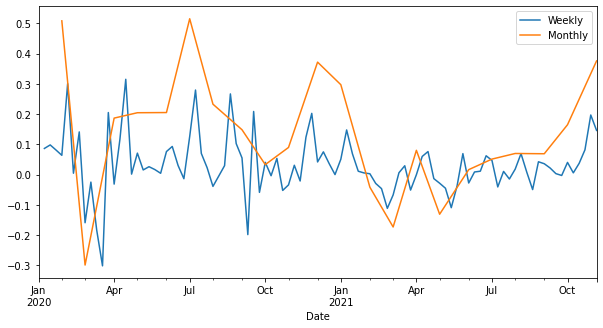

In [112]:
plt.figure(figsize=(10,5))
weekly_return.plot(label='Weekly')
monthly_return.plot(label='Monthly')
plt.legend()
plt.show()

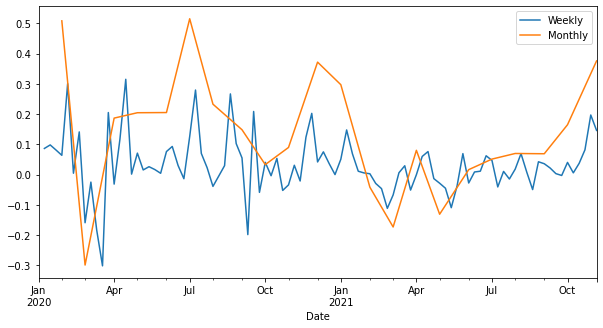

In [113]:
# similary this can be reduced into shorter steps
plt.figure(figsize=(10,5))
df.resample('W').mean()['Close'].pct_change().plot(label='Weekly')
df.resample('M').mean()['Close'].pct_change().plot(label='Monthly')
plt.legend()
plt.show()

### There is more

In [114]:
df.resample('M').mean()
df.resample('M').std()
df.resample('M').median()
df.resample('M').last().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-31,130.600006,126.503998,128.000000,130.113998,78596500.0,130.113998
2020-02-29,138.104004,122.304001,125.940002,133.598007,121114500.0,133.598007
2020-03-31,108.592003,99.400002,100.250000,104.800003,88857500.0,104.800003
2020-04-30,173.964005,152.699997,171.037994,156.376007,142359500.0,156.376007
2020-05-31,167.000000,160.841995,161.750000,167.000000,58822500.0,167.000000


In [115]:
df.resample('H').ffill().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02 00:00:00,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-02 01:00:00,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-02 02:00:00,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-02 03:00:00,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-02 04:00:00,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002


# Dealing with Outliers in Time Series Data

In [289]:
import pandas as pd
import matplotlib.pyplot as plt

from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.copod import COPOD

from pyod.utils.utility import standardizer

from pathlib import Path

In [302]:
# df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_6005.csv',
#                 index_col='timestamp',
#                 parse_dates=True)
# file = Path('../../datasets/Ch7/speed_7578.csv')
# df.to_csv(file)

In [310]:
file = Path('../../datasets/Ch7/speed_7578.csv')
df = pd.read_csv(file,
                index_col='timestamp',
                parse_dates=True)

scaled = standardizer(df)
df_scaled = pd.DataFrame(data=scaled, index=df.index, columns=['value'])
df_scaled.head()

,value
timestamp,
2015-08-31 18:22:00,0.925481
2015-08-31 18:32:00,-0.218048
2015-08-31 18:57:00,0.239364
2015-08-31 19:07:00,1.382893
2015-08-31 19:12:00,0.925481


In [311]:
df_scaled.describe()

,value
count,2.500000e+03
mean,-5.026202e-16
std,1.000200e+00
min,-7.079224e+00
25%,-5.611070e-01
50%,1.065769e-02
75%,6.967753e-01
max,3.098187e+00


<AxesSubplot:xlabel='timestamp'>

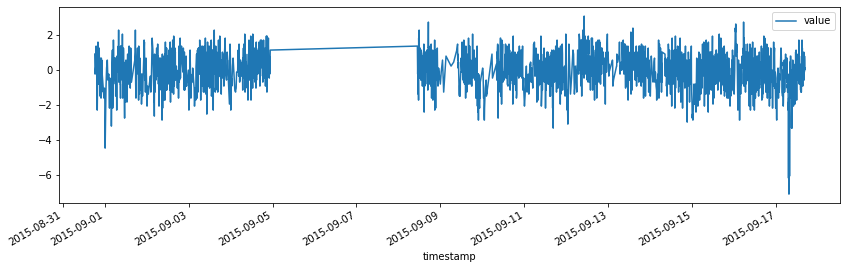

In [307]:
df_scaled.plot(figsize=(14, 4))

In [330]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.02

classifiers = {
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction),
        'Local Outlier Factor': LOF(n_neighbors=20, contamination=outliers_fraction),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Copula-Based Outlier Detection (COPOD)' : COPOD(contamination=outliers_fraction)
}

In [331]:
# X = df_scaled.values.reshape(-1,1)

In [332]:
for clf_name, clf in classifiers.items():
    clf.fit(scaled)
    y_pred = clf.predict(scaled)
    
    df_scaled[clf_name] = y_pred

In [343]:
df_scaled.columns

Index(['value', 'Isolation Forest', 'K Nearest Neighbors (KNN)', 'Average KNN',
       'Local Outlier Factor', 'Histogram-base Outlier Detection (HBOS)',
       'Copula-Based Outlier Detection (COPOD)'],
      dtype='object')

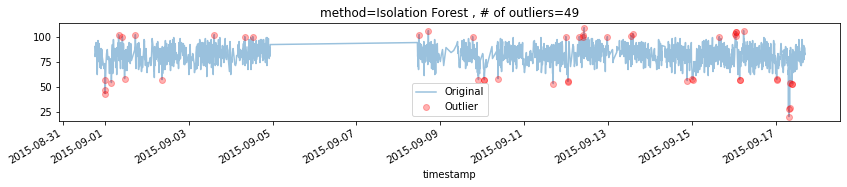

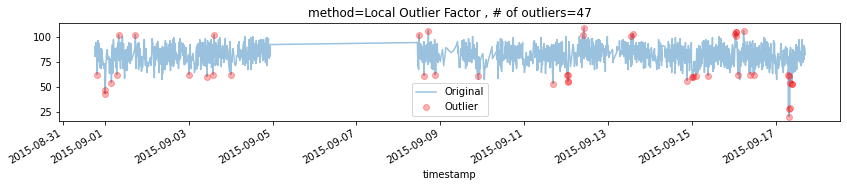

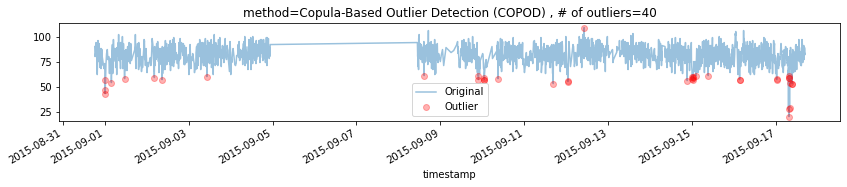

In [344]:
for c in df_scaled[['Isolation Forest', 'Local Outlier Factor', 'Copula-Based Outlier Detection (COPOD)']]:
    cnt = df_scaled[c].sum()
    ax = df.plot(figsize=(14, 2), 
                 title=f'method={c} , # of outliers={cnt}', 
                 alpha=0.45)
    vals = df_scaled[df_scaled[c] == 1].index
    df.loc[vals].plot(style='o',
                      color='red', 
                      ax=ax,
                      alpha=0.30)
    plt.legend(['Original', 'Outlier'])
    plt.show()

In [345]:
df.shape

(2500, 1)

### There is more

In [483]:
from kats.detectors.outlier import OutlierDetector
from kats.consts import TimeSeriesData

In [484]:
file = Path('../../datasets/Ch7/TravelTime_387.csv')

In [492]:
df = pd.read_csv(file, 
                 header=0, 
                 names=['time', 'value'], 
                 parse_dates=['time'])

In [493]:
ts = TimeSeriesData(df)

In [500]:
ts_outliers = OutlierDetector(ts, iqr_mult=0.5)

In [501]:
ts_outliers.detector()

In [502]:
ts_outliers.outliers[0]

[Timestamp('2015-07-13 14:24:00'),
 Timestamp('2015-07-14 14:24:00'),
 Timestamp('2015-07-15 14:24:00'),
 Timestamp('2015-07-16 14:24:00'),
 Timestamp('2015-08-23 14:24:00'),
 Timestamp('2015-08-24 14:24:00'),
 Timestamp('2015-08-25 14:24:00'),
 Timestamp('2015-08-26 14:24:00'),
 Timestamp('2015-08-27 14:24:00'),
 Timestamp('2015-08-28 14:24:00'),
 Timestamp('2015-08-31 14:24:00'),
 Timestamp('2015-09-01 14:24:00')]